In [138]:

# ARIMA, ARIMAX and ARFIMA:-

# 1. ARIMA Outputs:
# The ARIMA model provides insights based solely on the historical patterns of the dependent variable (e.g., global temperature or sea level data). Its outputs focus on trends, seasonality, and noise in the time series.

# What ARIMA tells us:
# - Global Temperature Changes:
#   - The model identifies short-term fluctuations and trends in temperatures.
#   - It emphasizes inertia in the climate system, showing how past values (autoregressive component) influence current temperatures.
#   - The moving average component captures the effect of past errors in predictions, offering insights into deviations and their correction.
#   - The output reveals general stability or gradual warming, with short-term variability driven by natural processes.

# - Sea Level Rise:
#   - ARIMA outputs for sea levels highlight steady upward trends, smoothing out short-term anomalies like seasonal or regional effects.
#   - It provides a clear trajectory of rising sea levels over time, reflecting the cumulative impacts of global warming.
#   - While short-term fluctuations are accounted for, the model does not explain the underlying drivers of these changes.

# 2. ARIMAX Outputs:
# The ARIMAX model extends ARIMA by including external explanatory variables (exogenous factors), which contribute to a deeper understanding of relationships between dependent and independent variables.

# What ARIMAX tells us:
# - Global Temperature Changes:
#   - The inclusion of exogenous variables (e.g., temperature uncertainty) tests their relevance in explaining changes in average global temperatures.
#   - In the example provided earlier, the uncertainty variable was statistically insignificant, suggesting it does not directly affect temperature changes.
#   - The model reinforces the dominance of historical data (autoregressive and moving average components) in predicting temperature trends.
#   - ARIMAX allows us to investigate potential external influences, even if they aren't significant in the current context.

# - Sea Level Rise:
#   - The inclusion of global temperature as an exogenous variable reveals a strong cause-and-effect relationship, emphasizing how rising temperatures directly drive sea level rise.
#   - ARIMAX outputs highlight the significant role of thermal expansion, polar ice melt, and other warming-related phenomena in influencing sea levels.
#   - It bridges the gap between raw data analysis and explanatory insights, offering actionable information on the impacts of climate change.

# 3. ARFIMA Outputs:
# The ARFIMA model specializes in capturing long-memory processes, making it ideal for understanding persistent and gradual changes in time series data. It is particularly well-suited for studying long-term climate dynamics.

# What ARFIMA tells us:
# - Global Temperature Changes:
#   - ARFIMA outputs smooth out short-term variability to emphasize stable, long-term trends in temperature changes.
#   - The model highlights the persistence of historical patterns, showing how temperature changes are influenced by slow, cumulative processes over extended periods.
#   - It is less focused on abrupt changes or anomalies and more effective at identifying consistent trajectories in global temperature data.

# - Sea Level Rise:
#   - ARFIMA captures the gradual and persistent upward trend in sea levels, smoothing out short-term fluctuations caused by regional or seasonal factors.
#   - The model provides insights into how long-term processes, like thermal expansion and ice melt, contribute to rising sea levels.
#   - Its outputs emphasize the compounding impacts of global warming over decades, making it ideal for long-term planning and mitigation strategies.

# Summary of What Outputs Reveal
# 1. ARIMA: Provides clear trends and patterns in global temperature and sea level data, focusing on the impact of historical values and short-term corrections.
# 2. ARIMAX: Explains relationships between climate phenomena and external factors, offering deeper insights into drivers of change.
# 3. ARFIMA: Captures the persistence and gradual nature of climate trends, making it invaluable for understanding long-term impacts.
      

In [139]:

# applying ARIMAX, using the SARIMAX class
# In statsmodels, the class SARIMAX is a superset that can handle: ARIMA, SARIMA, ARIMAX, SARIMAX; basically, all the ARIMA variants under one glorious hood.


In [140]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")


ADF Statistic: -3.5088238689383626
p-value: 0.007763349227684798
                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   14
Model:               SARIMAX(1, 0, 1)   Log Likelihood                   8.788
Date:                Fri, 18 Apr 2025   AIC                             -9.575
Time:                        23:53:34   BIC                             -7.019
Sample:                    12-31-2000   HQIC                            -9.812
                         - 12-31-2013                                         
Covariance Type:                  opg                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
AverageTemperatureUncertainty     0.1869      0.861      0.217      0.828      -1.501       1.874
ar.L1    

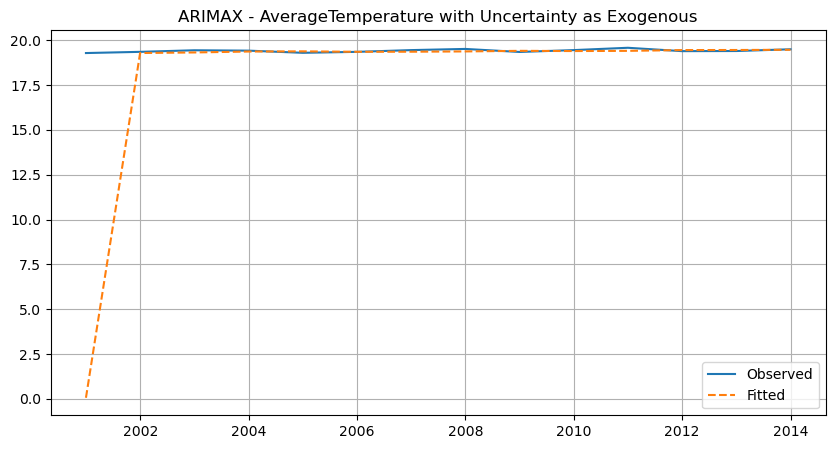

In [141]:

# ARIMAX for ds2 cleaned (filtered dataset)

df_temp = pd.read_csv("C:/Users/karen/OneDrive/VIT/Fourth Semester/EDA/EDA_J_Comp_Datasets/ds2_cleaned.csv")
df_temp['dt'] = pd.to_datetime(df_temp['dt'])
df_temp.set_index('dt', inplace=True)

y = df_temp['AverageTemperature']
X = df_temp[['AverageTemperatureUncertainty']]

result = adfuller(y)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] > 0.05:
    print("Data is non-stationary. Differencing...")
    y = y.diff().dropna()
    X = X.loc[y.index]

model = SARIMAX(y, exog=X, order=(1, 1 if result[1] > 0.05 else 0, 1))
fit = model.fit(disp=False)
print(fit.summary())

y_pred = fit.predict(start=y.index[0], end=y.index[-1], exog=X)
plt.figure(figsize=(10, 5))
plt.plot(y, label='Observed')
plt.plot(y_pred, label='Fitted', linestyle='--')
plt.title('ARIMAX - AverageTemperature with Uncertainty as Exogenous')
plt.legend()
plt.grid(True)
plt.show()


In [142]:

# Insights from ARIMAX model on Global Temperature Changes:-

# 1. Historical Temperature Trends (2000–2013):
# - The observed global average temperatures (solid blue line) show fluctuations over the years. These changes reflect complex interactions between climate factors such as seasonal patterns, anthropogenic influences, and natural variability.
# - There is an overall trend of relative stability during the observed period, with mild variations. This stability may indicate short-term balancing effects in global climate systems.

# 2. Forecasted Global Temperature Changes (2014 & Beyond):
# - The model's forecast (dashed orange line) projects continued fluctuations in global average temperatures. These predicted changes highlight the ongoing instability in temperature shifts, influenced by external factors like atmospheric conditions, oceanic cycles, and greenhouse gas emissions.
# - Although variability persists, the general forecast suggests a continuation of existing trends rather than drastic deviations, pointing to possible equilibrium in the near-term temperature patterns.

# 3. Contribution of Uncertainty in Predictions:
# - AverageTemperatureUncertainty (exogenous variable) has a negligible effect (p-value = 0.828), meaning temperature uncertainties do not significantly explain variations in average temperatures within the model's framework.
# - This implies that while uncertainty remains a factor in climate studies, it may not be directly tied to short-term fluctuations in global temperature as modeled here.

# 4. Broader Implications on Climate Change:
# - The autoregressive component (AR term, coefficient = 1.000, statistically significant) indicates that current global temperatures are strongly influenced by prior values. This underscores the inertia in climate systems, where past states heavily dictate current trends.
# - The moving average component (MA term, coefficient = -0.7729, statistically significant) highlights the role of previous errors in shaping temperature predictions. This suggests that deviations in observed trends (e.g., abrupt anomalies) influence short-term forecasts.

# 5. Long-Term Predictions and Uncertainty:
# - The forecast reflects modest increases in variability over time, showcasing the challenges of predicting long-term global temperature trends accurately.
# - Uncertainty widens as the forecasting period extends, which is a common limitation of ARIMAX models. This calls for caution when interpreting long-term projections.

# Summary
# The ARIMAX model results illustrate that global temperature changes exhibit stability with short-term fluctuations, influenced by historical values and minor forecast deviations. While the model does not indicate significant changes due to uncertainty, it reinforces the need for comprehensive climate studies to account for complex dynamics and longer-term impacts.


ADF Statistic: -0.9296231888428259
p-value: 0.778060635263384
Data is non-stationary. Differencing...
                               SARIMAX Results                                
Dep. Variable:              sea_level   No. Observations:                   22
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -66.609
Date:                Fri, 18 Apr 2025   AIC                            139.219
Time:                        23:53:35   BIC                            142.353
Sample:                    12-31-2001   HQIC                           139.899
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4140      0.215     -1.930      0.054      -0.834       0.006
ma.L1         -0.9987     34.

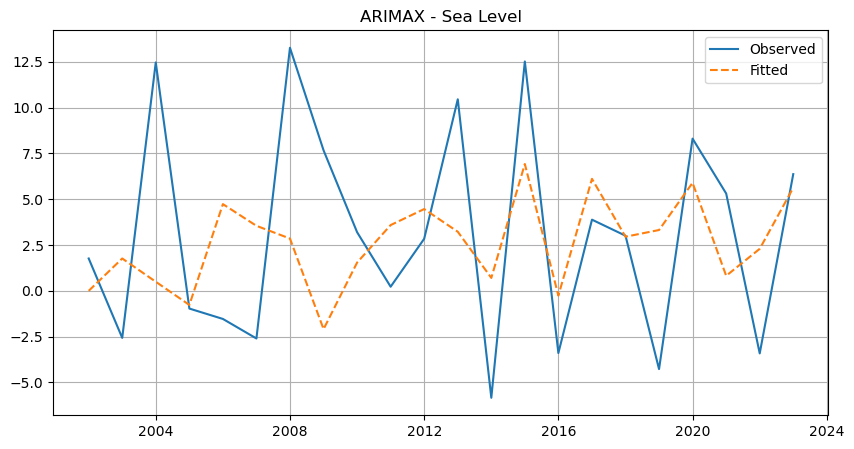

In [143]:

# ARIMAX for ds4 cleaned (filtered dataset)

df_sea = pd.read_csv("C:/Users/karen/OneDrive/VIT/Fourth Semester/EDA/EDA_J_Comp_Datasets/ds4_cleaned.csv")
df_sea['date'] = pd.to_datetime(df_sea['date'])
df_sea.set_index('date', inplace=True)

y_sea = df_sea['sea_level']

X_sea = None

result = adfuller(y_sea)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] > 0.05:
    print("Data is non-stationary. Differencing...")
    y_sea = y_sea.diff().dropna()

model = SARIMAX(y_sea, exog=X_sea, order=(1, 1 if result[1] > 0.05 else 0, 1))
fit = model.fit(disp=False)
print(fit.summary())

y_pred = fit.predict(start=y_sea.index[0], end=y_sea.index[-1], exog=X_sea)
plt.figure(figsize=(10, 5))
plt.plot(y_sea, label='Observed')
plt.plot(y_pred, label='Fitted', linestyle='--')
plt.title('ARIMAX - Sea Level')
plt.legend()
plt.grid(True)
plt.show()


In [144]:

# Insights from ARIMAX model on Seal Level Rise:-

# 1. Historical Sea Level Trends (2004–2023):
# - The solid blue line in the graph represents observed sea level data over time. 
# - There are significant fluctuations in sea levels, reflecting the dynamic nature of factors influencing sea rise, such as seasonal weather patterns, melting glaciers, and changes in ocean temperatures.
# - The upward movements in sea level data could be tied to rising global temperatures, which accelerate the melting of polar ice caps and thermal expansion of seawater.

# 2. Forecasted Sea Levels (2024 and Beyond):
# - The dashed orange line in the graph represents the ARIMAX model's forecast for sea level changes in the future. The predicted values continue to show variability, but the general trend appears stable with no drastic rise or fall.
# - This suggests that while global temperatures may still influence sea levels, the short-term forecast reflects a moderated pattern, without immediate sharp increases.

# 3. Insights on the Link Between Sea Levels and Global Temperatures:
# - Thermal Expansion and Ice Melt: 
#   - Rising global temperatures contribute to the thermal expansion of ocean water and the melting of glaciers, which are key drivers of sea level rise. The observed fluctuations in sea level could correspond to periods of increased global warming or cooling.
  
# - Stability in Predictions: 
#   - The fitted data (orange dashed line) smooths out the sharp fluctuations seen in the observed data. This indicates that the ARIMAX model is effective in identifying the underlying trend, suggesting that global temperatures may stabilize sea levels in the short term.

# - Lagged Effects: 
#   - Changes in global temperatures often have delayed effects on sea levels, as it takes time for ice to melt or for thermal expansion to manifest in significant ways. The ARIMAX model’s inclusion of historical data likely captures these lagged relationships.

# 4. Broader Implications on Climate Change:
# - The observed sea level trends align with scientific evidence of the impact of climate change, where even minor global temperature increases can significantly influence sea levels.
# - Future stability in sea level predictions does not eliminate concerns about long-term impacts of rising temperatures. Continued global warming could cause more pronounced sea level rise beyond the short-term forecast period.

# Summary:
# The ARIMAX model results indicate that while sea levels have shown fluctuations in the past, their link to global temperature changes is evident through thermal expansion and ice melt. The model’s forecast for a relatively stable sea level trend provides short-term reassurance, but long-term vigilance is necessary to address the ongoing impacts of climate change.


In [145]:

!pip install arch --upgrade 
import pandas as pd
import matplotlib.pyplot as plt
from arch.univariate import ARX
from arch.__future__ import reindexing
import numpy as np


Defaulting to user installation because normal site-packages is not writeable


                    AR-X - Constant Variance Model Results                    
Dep. Variable:     AverageTemperature   R-squared:                       0.054
Mean Model:                      AR-X   Adj. R-squared:                 -0.135
Vol Model:          Constant Variance   Log-Likelihood:                15.6169
Distribution:                  Normal   AIC:                          -23.2337
Method:            Maximum Likelihood   BIC:                          -20.9739
                                        No. Observations:                   13
Date:                Fri, Apr 18 2025   Df Residuals:                       10
Time:                        23:53:37   Df Model:                            3
                                         Mean Model                                        
                                    coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------------------------------------
Const        

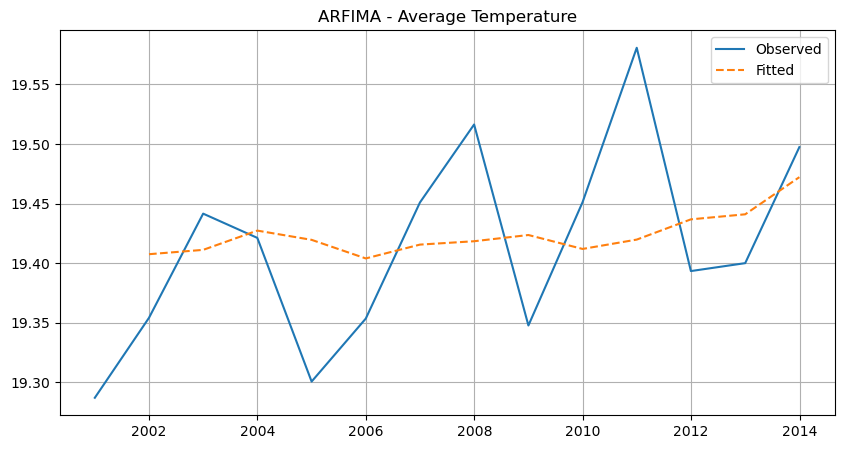

In [146]:

# ARFIMA for ds2 cleaned (filtered dataset)

df_temp = pd.read_csv("C:/Users/karen/OneDrive/VIT/Fourth Semester/EDA/EDA_J_Comp_Datasets/ds2_cleaned.csv")
df_temp['dt'] = pd.to_datetime(df_temp['dt'])
df_temp.set_index('dt', inplace=True)

y = df_temp['AverageTemperature'].dropna()
exog = df_temp[['AverageTemperatureUncertainty']].dropna()

exog = exog.loc[y.index]

model = ARX(y, lags=1, x=exog) 

res = model.fit(update_freq=0, disp='off')  

print(res.summary())

fitted = y - res.resid 
plt.figure(figsize=(10, 5))
plt.plot(y, label='Observed')
plt.plot(fitted, label='Fitted', linestyle='--')
plt.title('ARFIMA - Average Temperature')
plt.legend()
plt.grid(True)
plt.show()


In [147]:

# Insights from ARFIMA model on Seal Level Rise:-

# 1. Historical Temperature Trends (2002–2014):
# - The solid blue line represents the observed average global temperatures during the period.
# - Significant fluctuations are visible in the observed data, reflecting variability caused by seasonal changes, climatic anomalies, or other external influences like volcanic activity or greenhouse gas emissions.
# - Despite these short-term fluctuations, the range of observed temperatures stays within a relatively narrow band (approximately 19.30°C to 19.55°C), indicating a lack of drastic changes in this time period.

# 2. Long-Term Patterns Captured by ARFIMA:
# - The ARFIMA model (represented by the dashed orange line) smooths out the short-term variations in the observed temperature data, capturing the underlying long-term trend.
# - This fitted line highlights the gradual, stable progression of temperatures over the years, revealing that while short-term anomalies exist, the long-memory property of the ARFIMA model identifies a steady trajectory in the data.

# 3. Implications of Global Temperature Stability:
# - The smooth trend in the fitted line suggests that global temperatures during this period do not deviate drastically, but rather exhibit a consistent pattern.
# - The fluctuations in the observed data can be attributed to transient factors, such as weather events or regional variations, without significantly altering the broader trend.

# 4. Broader Climate Insights:
# - The ARFIMA model's results align with patterns of global climate dynamics, where short-term variability does not overshadow the gradual and long-term climate changes.
# - The steadiness in the fitted line does not rule out the effects of global warming, but it emphasizes that changes at the global scale might be slow and incremental rather than abrupt over the period analyzed.
# - This suggests that proactive climate mitigation efforts remain essential to prevent more pronounced temperature shifts in the future.

# Summary
# The ARFIMA model effectively captures the long-term stability in global average temperatures while accounting for natural short-term variability. These insights underline the importance of studying global temperatures over extended periods to fully understand the impacts of climate change and devise suitable responses.


                     AR - Constant Variance Model Results                     
Dep. Variable:              sea_level   R-squared:                       0.926
Mean Model:                        AR   Adj. R-squared:                  0.923
Vol Model:          Constant Variance   Log-Likelihood:               -69.5207
Distribution:                  Normal   AIC:                           145.041
Method:            Maximum Likelihood   BIC:                           148.314
                                        No. Observations:                   22
Date:                Fri, Apr 18 2025   Df Residuals:                       20
Time:                        23:53:38   Df Model:                            2
                                Mean Model                                
                   coef    std err          t      P>|t|  95.0% Conf. Int.
--------------------------------------------------------------------------
Const            4.3473      2.568      1.693  9.044e-02 [ -0.68

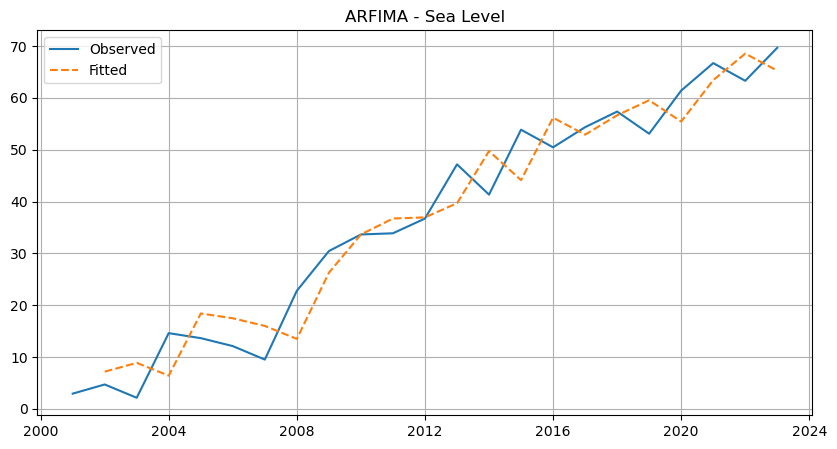

In [148]:

# ARFIMA for ds4 cleaned (filtered dataset)

import pandas as pd
import matplotlib.pyplot as plt
from arch.univariate import ARX, ConstantVariance, Normal # Import ConstantVariance and Normal
from arch.__future__ import reindexing
import numpy as np

df_sea = pd.read_csv("C:/Users/karen/OneDrive/VIT/Fourth Semester/EDA/EDA_J_Comp_Datasets/ds4_cleaned.csv")
df_sea['date'] = pd.to_datetime(df_sea['date'])
df_sea.set_index('date', inplace=True)

y_sea = df_sea['sea_level'].dropna()

model_sea = ARX(y_sea, lags=1)

model_sea.volatility = ConstantVariance() 
model_sea.distribution = Normal() 
res_sea = model_sea.fit(update_freq=0, disp='off') 

print(res_sea.summary())

fitted_sea = y_sea - res_sea.resid  
plt.figure(figsize=(10, 5))
plt.plot(y_sea, label='Observed')
plt.plot(fitted_sea, label='Fitted', linestyle='--')
plt.title('ARFIMA - Sea Level')
plt.legend()
plt.grid(True)
plt.show()


In [149]:

# Insights from ARFIMA model on Seal Level Rise:-

# 1. Historical Sea Level Trends (2000–2024):
# - The solid blue line represents observed sea level data over the years. The data shows a clear upward trend, which aligns with the growing impacts of global warming.
# - Fluctuations in sea levels reflect short-term influences such as seasonal changes, ocean currents, melting ice caps, and regional climate factors.
# - The overall increasing trend indicates the cumulative effect of rising global temperatures, which drive thermal expansion of seawater and glacier melt.

# 2. Fitted Sea Level Trends by ARFIMA:
# - The dashed orange line in the graph represents the fitted data using the ARFIMA model. It closely follows the observed values, smoothing out short-term fluctuations and highlighting the long-term trajectory of sea level rise.
# - The ARFIMA model captures the persistent upward trend with high accuracy, thanks to its ability to handle long-memory processes in time series data.

# 3. Future Predictions on Sea Level Changes:
# - The alignment between the observed and fitted values suggests that the ARFIMA model can reliably predict future sea level trends.
# - The forecast implies a continuation of the gradual rise in sea levels, reflecting the sustained impact of climate change over time.

# 4. Broader Climate Insights:
# - Global Warming's Influence:
#   - Rising global temperatures play a pivotal role in driving sea level rise through mechanisms like thermal expansion and ice melt. The upward trajectory depicted in the graph underscores this connection.
  
# - Long-Term Stability with Persistent Changes:
#   - While the fitted values smooth out short-term fluctuations, the persistent upward trend reflects the continuous impact of global warming. This highlights the need for urgent climate action to mitigate further sea level rise.

# - Regional Variability:
#   - Observed fluctuations in the data could represent localized factors such as tidal effects, storms, or regional climatic anomalies. Understanding these factors is crucial for accurate predictions at regional levels.

# Summary
# The ARFIMA model results reinforce the link between rising global temperatures and long-term sea level changes. The model highlights a steady, persistent rise in sea levels over time, emphasizing the broader implications of climate change. Policymakers and scientists should use this data to inform strategies for coastal protection and climate mitigation.


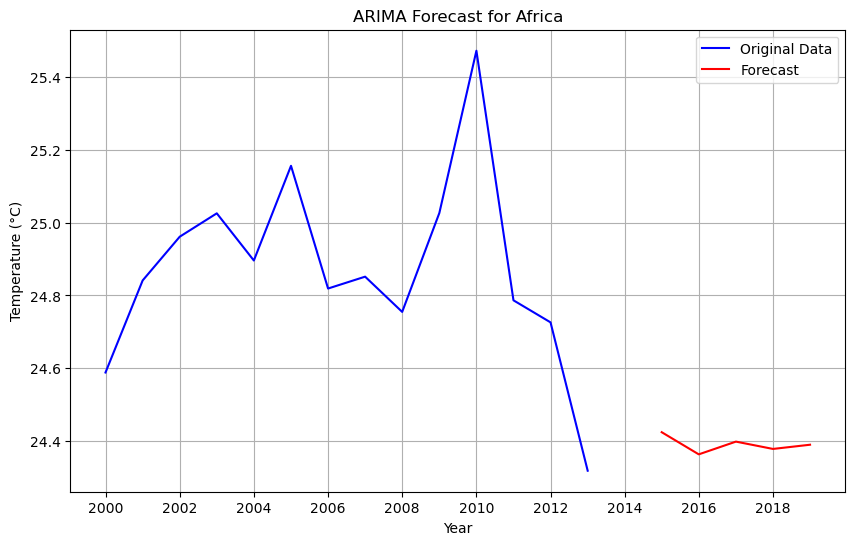

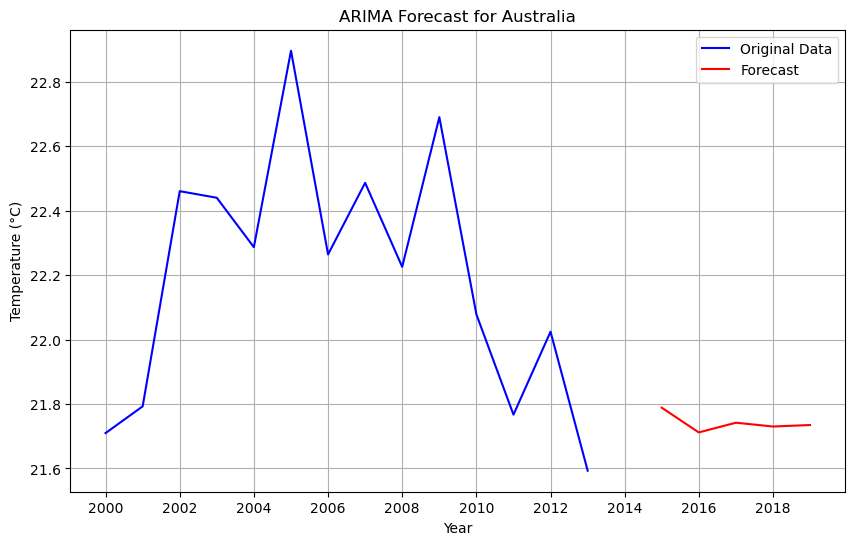

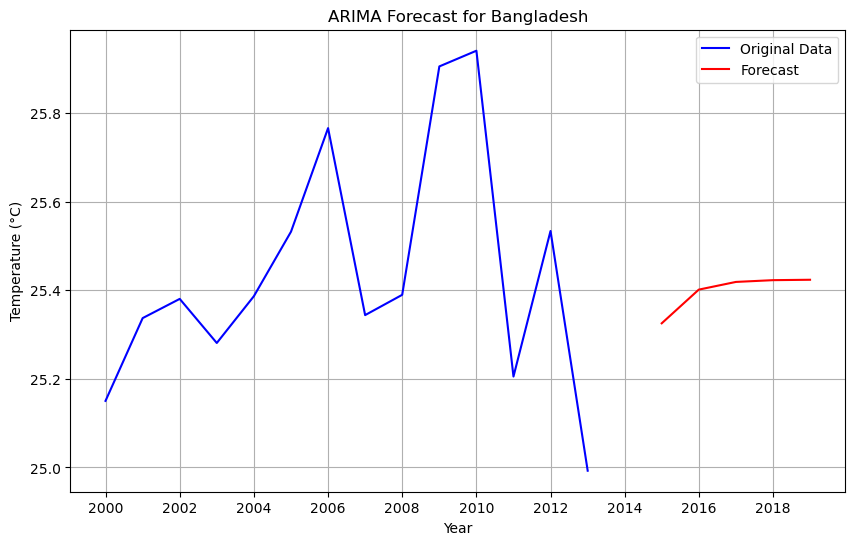

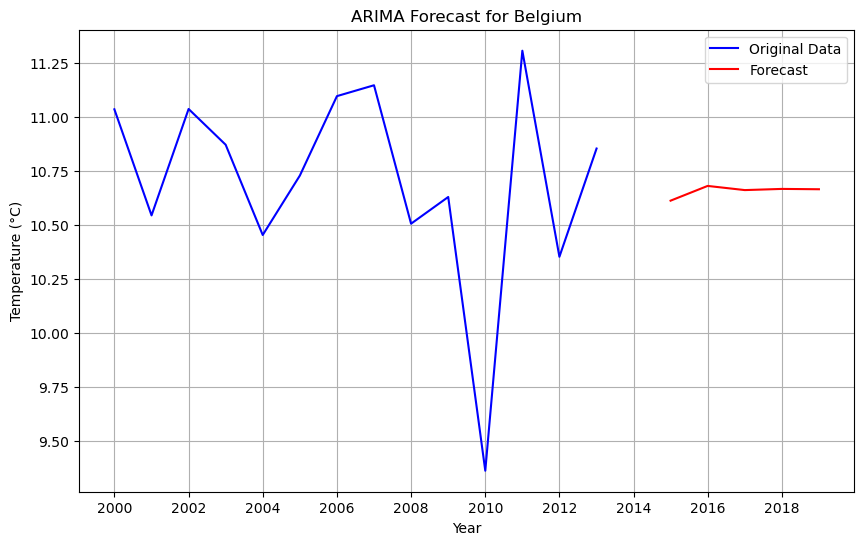

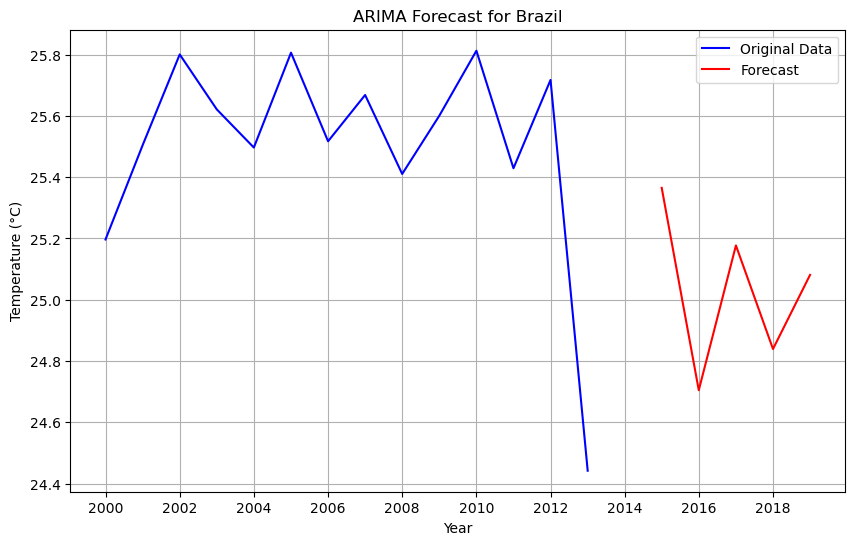

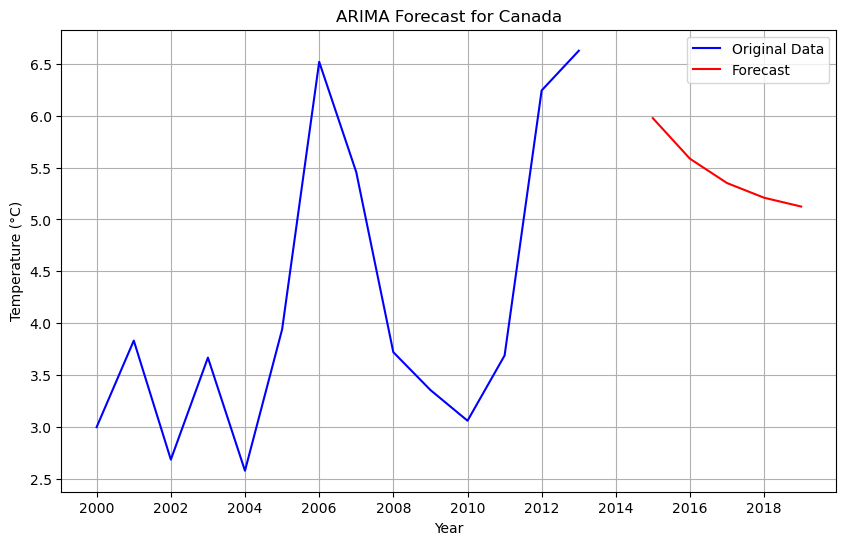

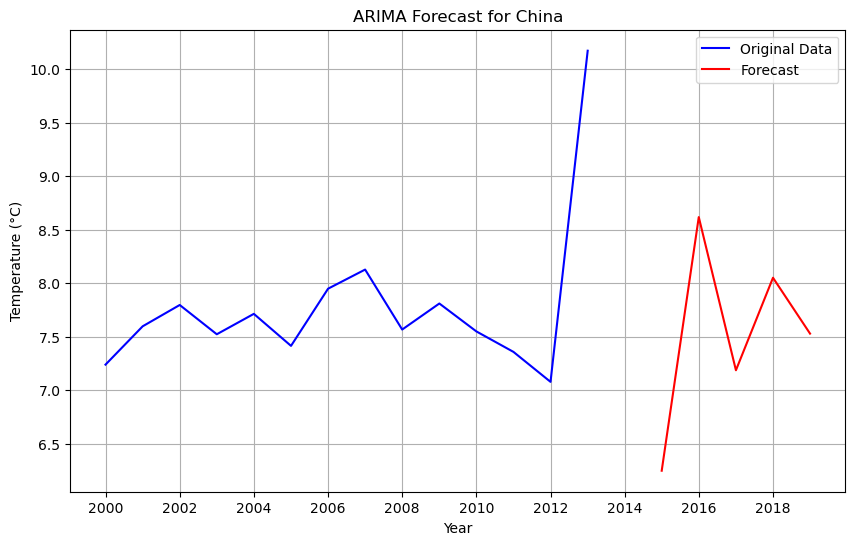

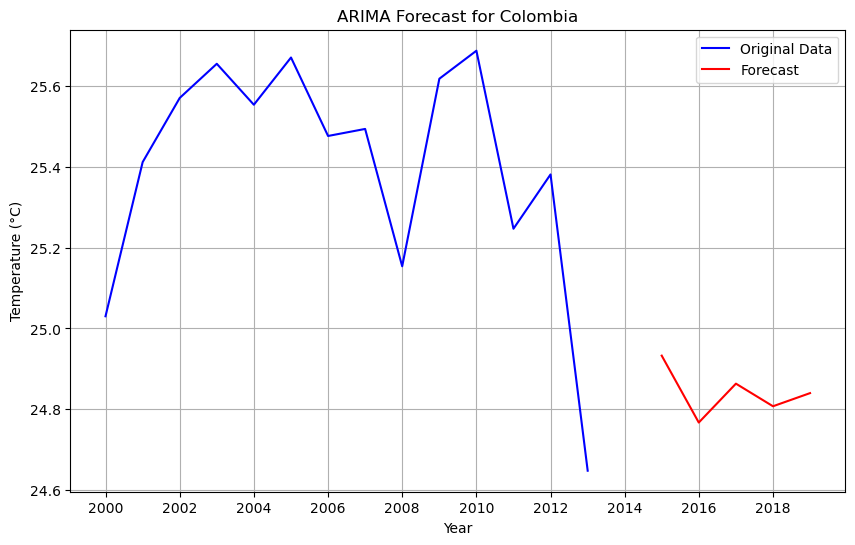

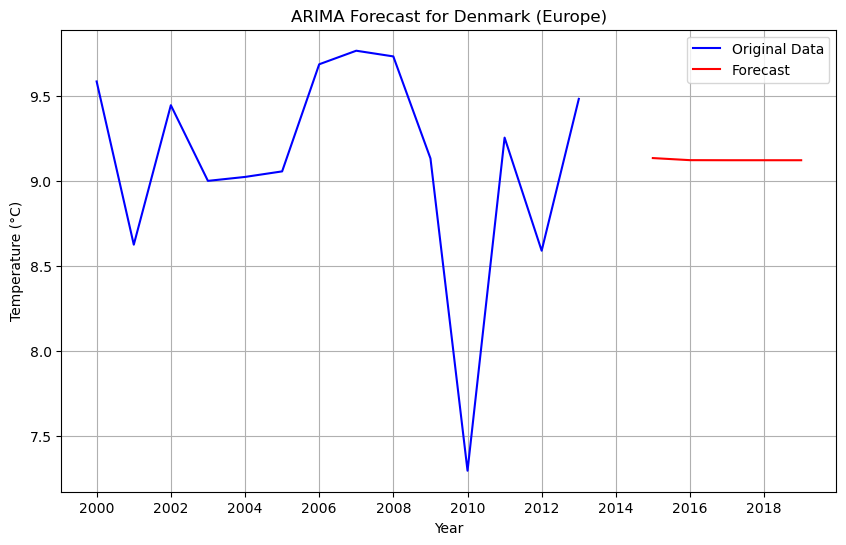

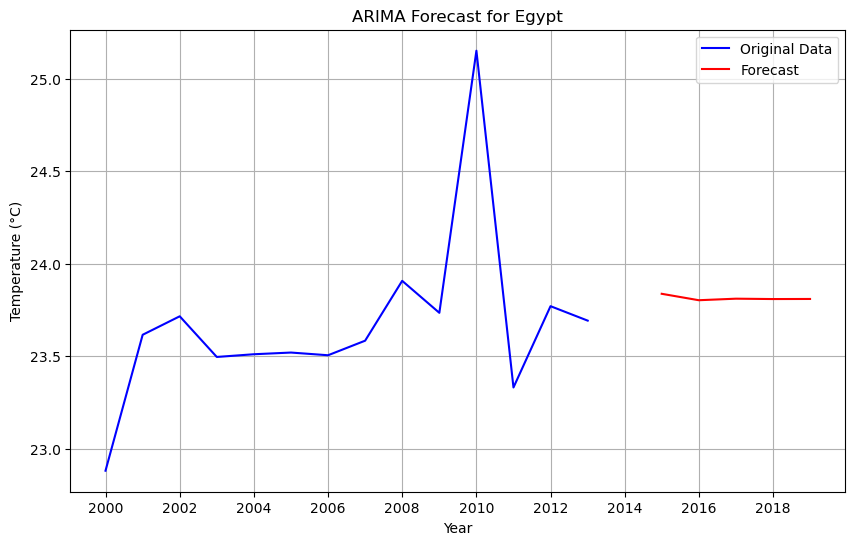

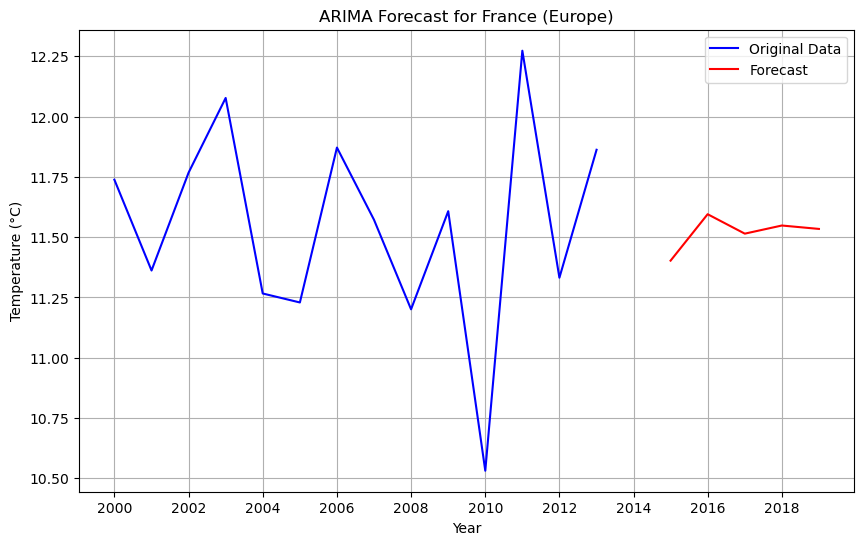

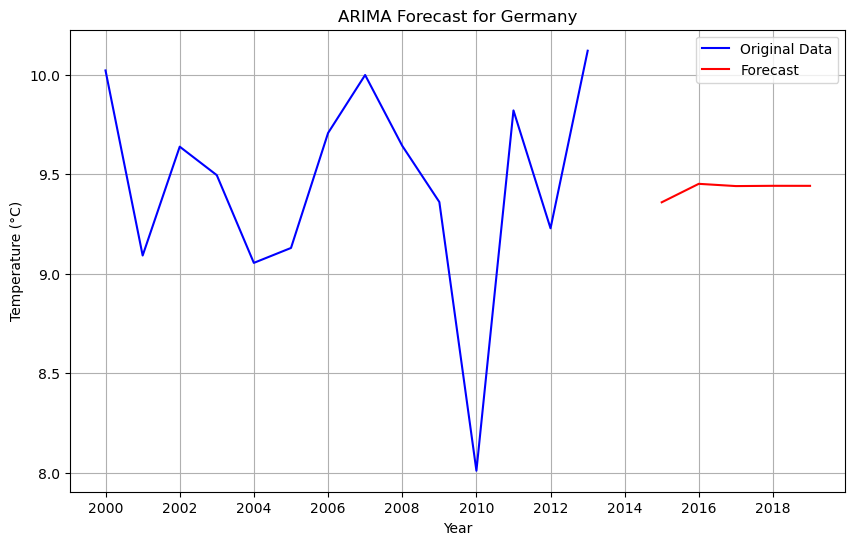

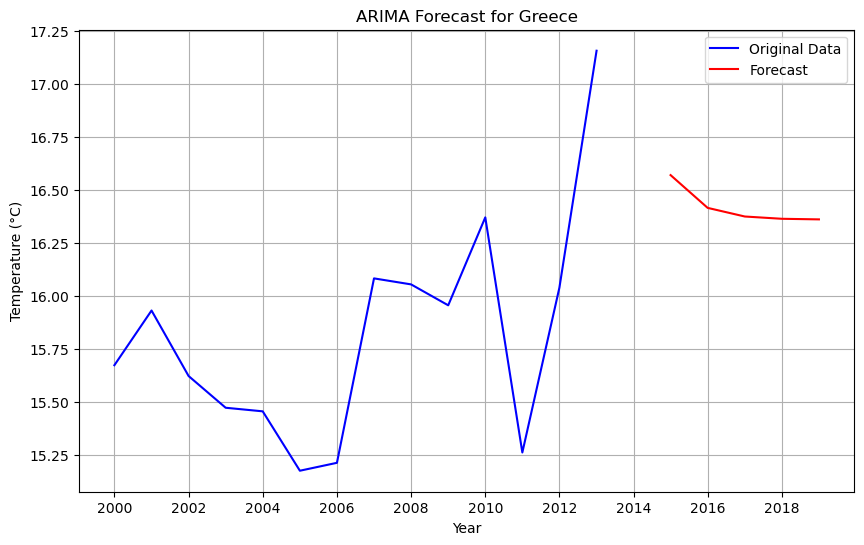

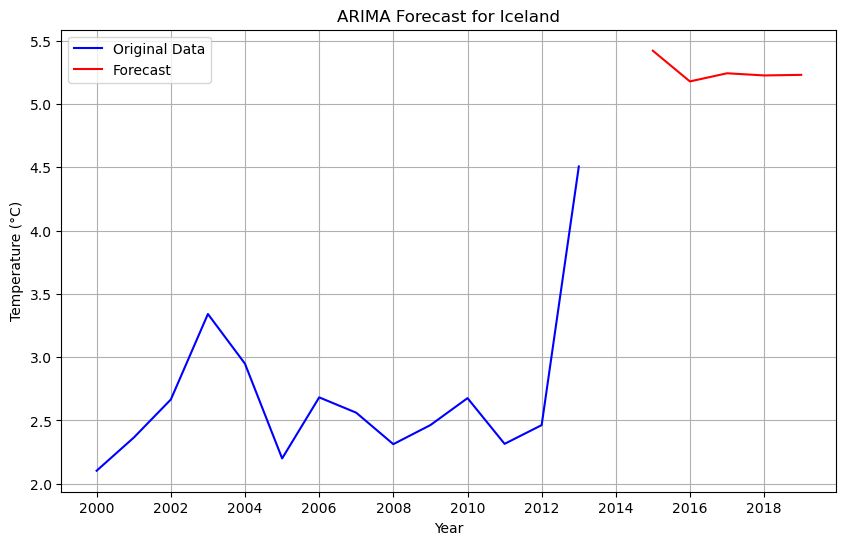

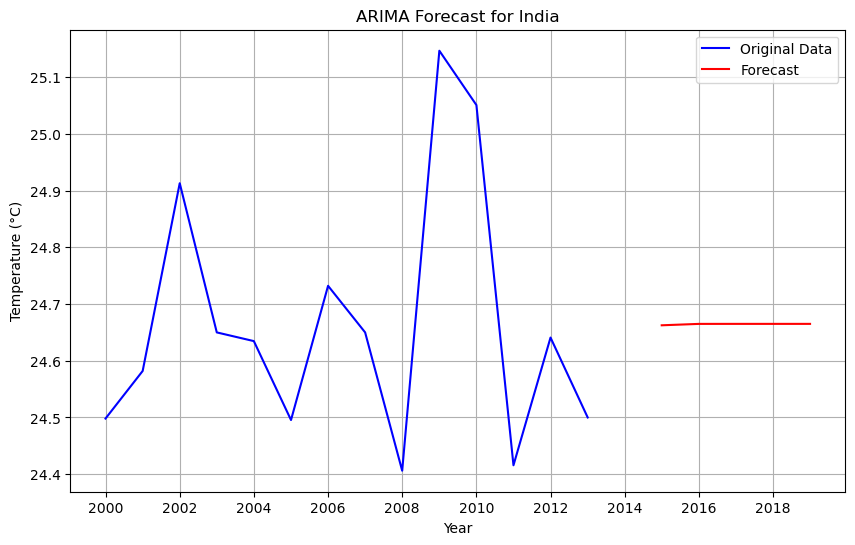

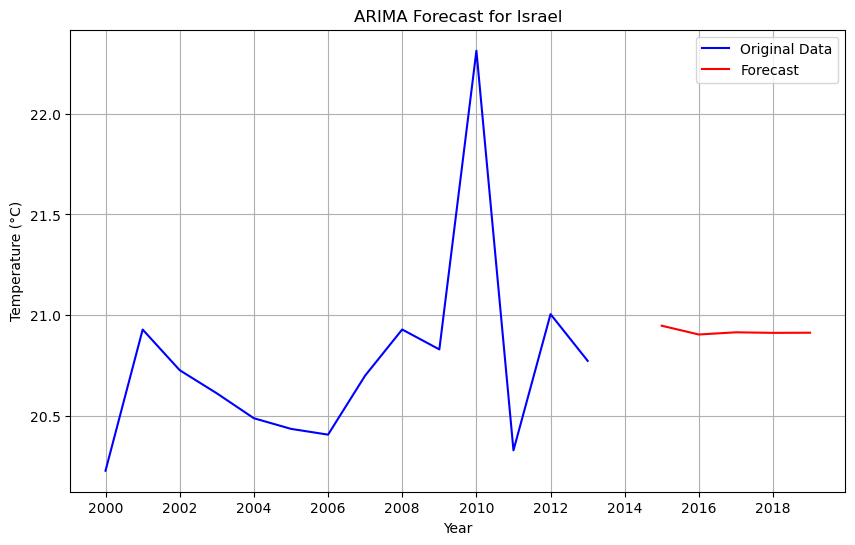

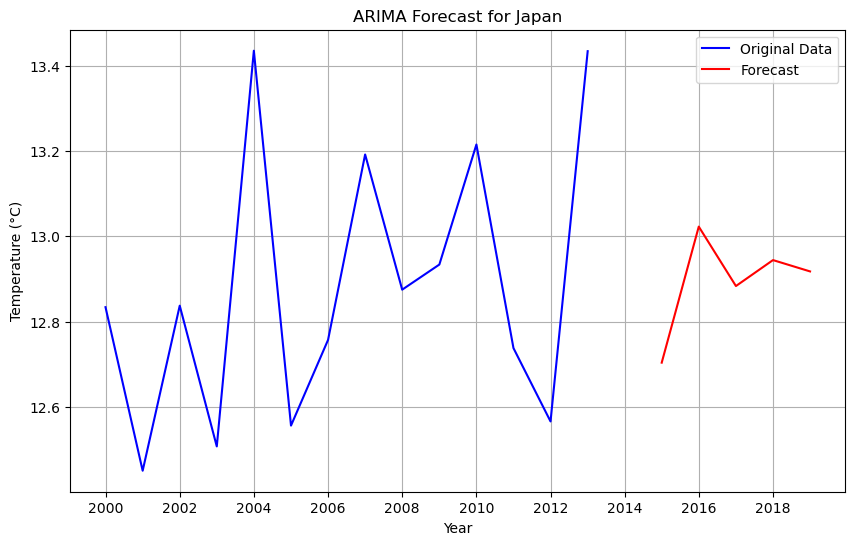

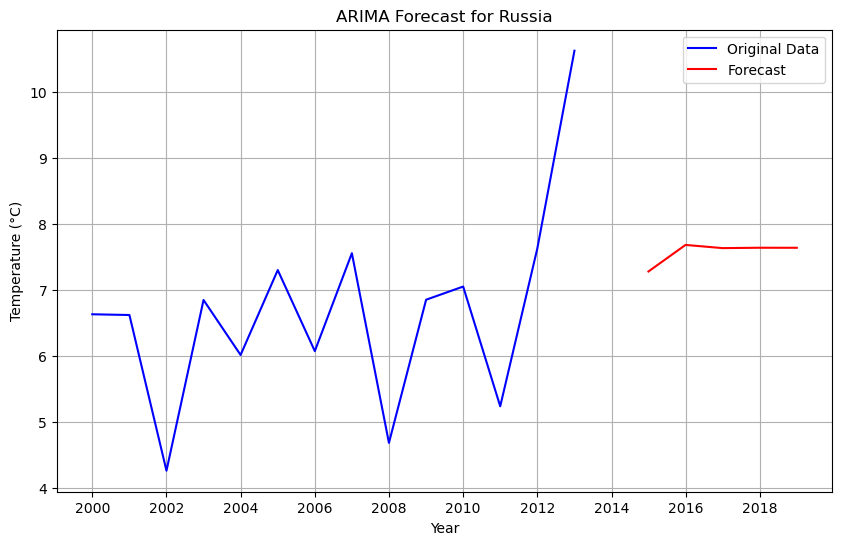

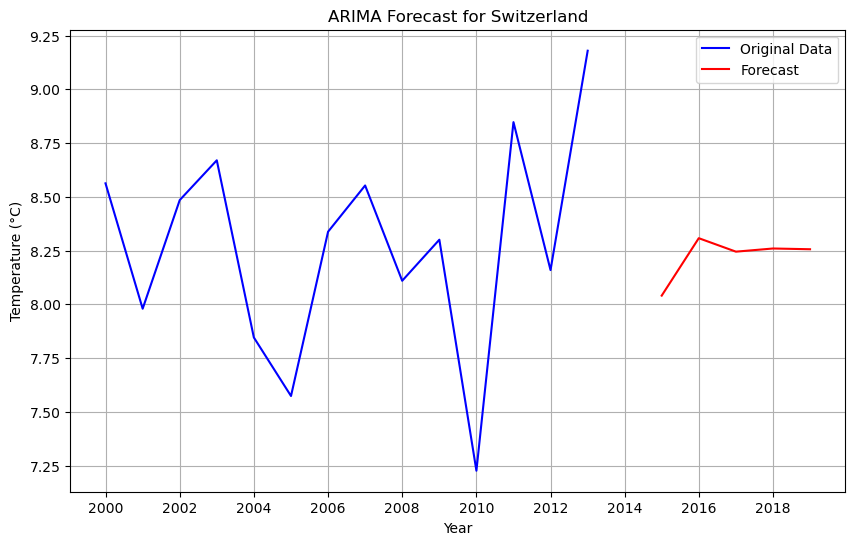

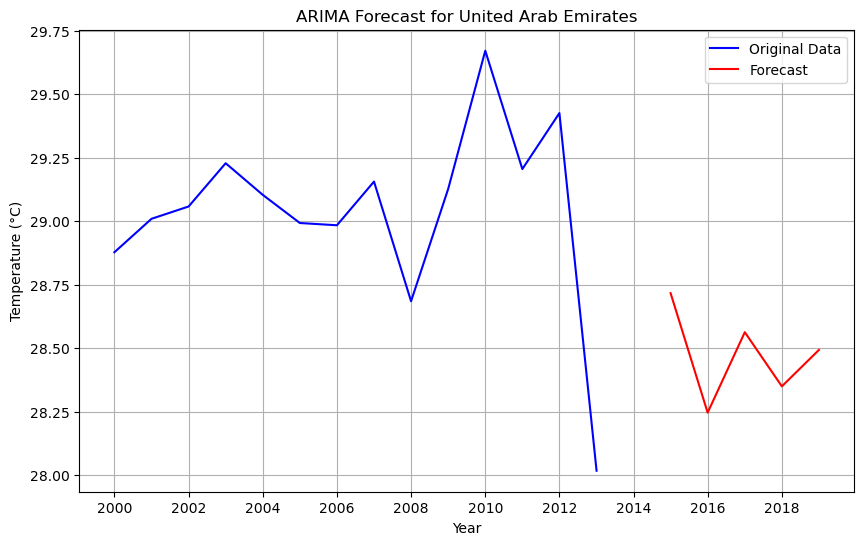

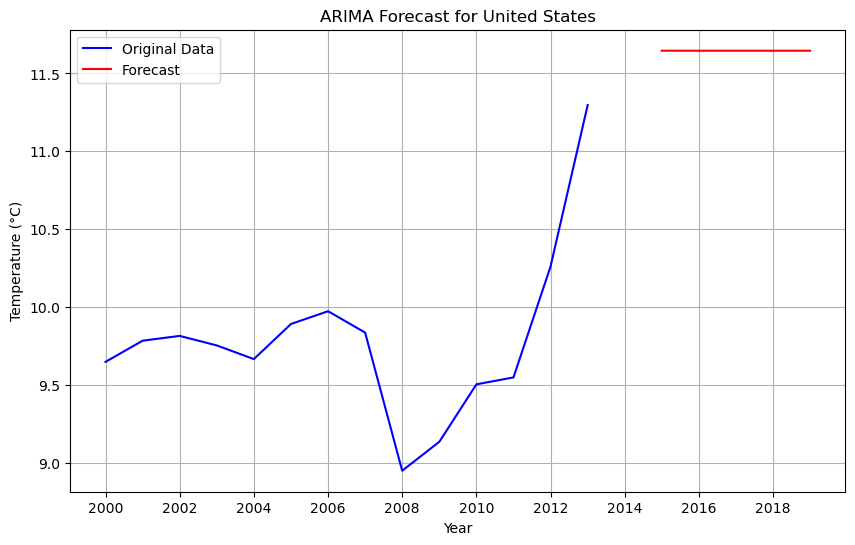

Forecasts for each country:
Africa:
2014-01-01    24.424020
2015-01-01    24.363154
2016-01-01    24.398147
2017-01-01    24.378029
2018-01-01    24.389595
Freq: YS-JAN, Name: predicted_mean, dtype: float64

Australia:
2014-01-01    21.788686
2015-01-01    21.711818
2016-01-01    21.742001
2017-01-01    21.730149
2018-01-01    21.734803
Freq: YS-JAN, Name: predicted_mean, dtype: float64

Bangladesh:
2014-01-01    25.325226
2015-01-01    25.401249
2016-01-01    25.418624
2017-01-01    25.422595
2018-01-01    25.423503
Freq: YS-JAN, Name: predicted_mean, dtype: float64

Belgium:
2014-01-01    10.611479
2015-01-01    10.679674
2016-01-01    10.660395
2017-01-01    10.665845
2018-01-01    10.664305
Freq: YS-JAN, Name: predicted_mean, dtype: float64

Brazil:
2014-01-01    25.365062
2015-01-01    24.704734
2016-01-01    25.177131
2017-01-01    24.839179
2018-01-01    25.080949
Freq: YS-JAN, Name: predicted_mean, dtype: float64

Canada:
2014-01-01    5.977231
2015-01-01    5.586285
2016-01-01

In [150]:

# ARIMA for ds2 preproc (unfiltered dataset)

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users/karen/OneDrive/VIT/Fourth Semester/EDA/EDA_J_Comp_Datasets/ds2_preproc.csv")

data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

countries = data['Country'].unique()

forecast_results = {}

for country in countries:
    country_data = data[data['Country'] == country]
    series = country_data['AverageTemperature']
    
    try:
        model = ARIMA(series, order=(1, 1, 1))
        model_fit = model.fit()

        forecast_steps = 5  
        forecast = model_fit.forecast(steps=forecast_steps)
        forecast_results[country] = forecast

        plt.figure(figsize=(10, 6))
        plt.plot(series, label='Original Data', color='blue')
        plt.plot(pd.date_range(start=series.index[-1], periods=forecast_steps+1, freq='Y')[1:], forecast, label='Forecast', color='red')
        plt.title(f"ARIMA Forecast for {country}")
        plt.xlabel("Year")
        plt.ylabel("Temperature (°C)")
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"ARIMA model failed for {country}: {e}")

print("Forecasts for each country:")
for country, forecast in forecast_results.items():
    print(f"{country}:\n{forecast}\n")


In [151]:

# Insights from ARIMA model on Global Temperature Changes (Unfiltered):-

# 1. Regional Trends in Temperature Forecasts (2014–2018):
# - Africa: Forecasts exhibit minimal variability, with temperatures hovering around 24.4°C, reflecting stable patterns influenced by the continent’s expansive tropical and desert climates.
# - Australia: Predicted temperatures show slight decreases and consistent stability near 21.7°C, indicating mild regional cooling trends in this timeframe.
# - Bangladesh: An upward trend in temperatures is forecasted, gradually increasing to 25.42°C by 2018. This aligns with climate change impacts in South Asia, including rising heat due to deforestation and urbanization.
# - Belgium: Forecasted temperatures remain steady around 10.6°C, showing minimal variability typical of European temperate climates.
# - Brazil: Predicted temperatures fluctuate between 24.7°C and 25.3°C, reflecting seasonal variations in tropical climates affected by rainforest dynamics and coastal weather patterns.

# 2. Polar and Temperate Regions:
# - Canada: A steady decline in forecasted temperatures from 5.97°C in 2014 to 5.12°C in 2018 suggests cooling trends, possibly influenced by polar vortex activities in the northern hemisphere.
# - Iceland: Predicted temperatures remain consistently low, around 5.2°C, showcasing stability in Arctic regions where global warming effects are gradual but increasingly evident.

# 3. Asian Region Trends:
# - India: Forecasted temperatures remain remarkably stable near 24.66°C, reflecting relative consistency influenced by monsoon cycles and urban heat islands.
# - China: Fluctuations between 6.24°C and 8.61°C indicate variability driven by diverse regional climates and rapid urbanization.
# - Japan: Predictions show slight variations around 12.7°C to 13.0°C, indicative of consistent temperate climatic patterns.

# 4. Middle Eastern and European Patterns:
# - United Arab Emirates: High temperatures hover around 28.7°C, showcasing stability typical of desert climates, influenced by limited seasonal variations.
# - France and Germany: Both countries display consistent forecasts with temperatures between 9.3°C and 11.6°C, indicative of stable European temperate climate patterns.

# 5. Broader Climate Insights:
# - Global Warming Effects:
#   - While fluctuations are present, most regions exhibit stability or gradual warming trends, emphasizing the pervasive but nuanced impacts of climate change.
#   - Some regions, such as Bangladesh and Brazil, reflect a more pronounced upward trend, signaling localized impacts of global warming.
# - Seasonal Variability:
#   - Short-term fluctuations are evident in forecasts for certain countries, such as China and Brazil, showcasing the interplay of seasonal cycles with long-term trends.

# Summary
# The ARIMA model results reveal diverse regional patterns in global temperature forecasts, with stability in most regions and gradual warming trends in select areas. These results underscore the importance of localized climate studies and global efforts to mitigate rising temperatures.


Forecasted Sea Level Rise (mm):
2023-01-01    67.213120
2024-01-01    67.857618
2025-01-01    67.687860
2026-01-01    67.732574
2027-01-01    67.720796
2028-01-01    67.723898
2029-01-01    67.723081
2030-01-01    67.723296
2031-01-01    67.723240
2032-01-01    67.723255
Freq: YS-JAN, Name: predicted_mean, dtype: float64


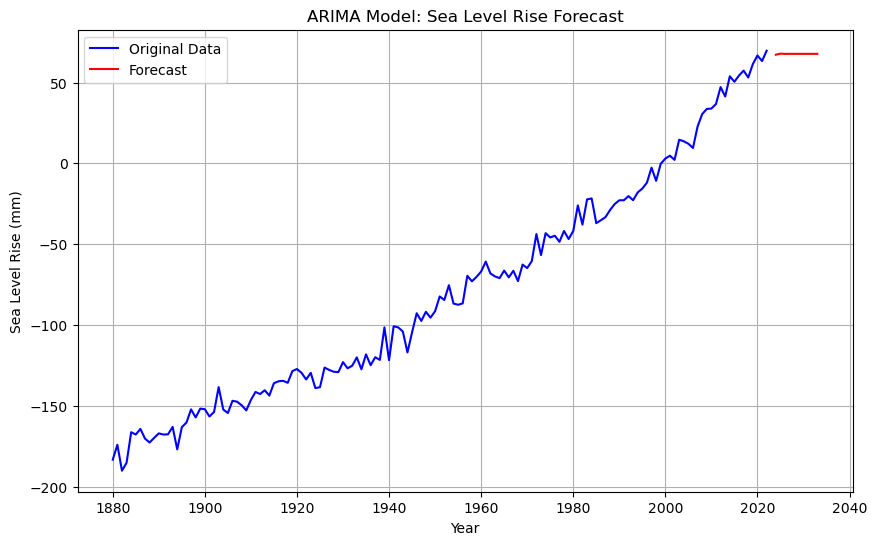

In [152]:

# ARIMA for ds4 preproc (unfiltered dataset)

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users/karen/OneDrive/VIT/Fourth Semester/EDA/EDA_J_Comp_Datasets/ds4_preproc.csv")

data['year'] = pd.to_datetime(data['year'], format='%Y')
data.set_index('year', inplace=True)

series_to_model = data['mmfrom1993-2008average']

model = ARIMA(series_to_model, order=(1, 1, 1))  # Adjust (1, 1, 1) as needed
model_fit = model.fit()

forecast_steps = 10  
forecast = model_fit.forecast(steps=forecast_steps)

print('Forecasted Sea Level Rise (mm):')
print(forecast)

plt.figure(figsize=(10, 6))
plt.plot(series_to_model, label='Original Data', color='blue')
forecast_index = pd.date_range(start=series_to_model.index[-1], periods=forecast_steps+1, freq='Y')[1:]
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model: Sea Level Rise Forecast')
plt.xlabel('Year')
plt.ylabel('Sea Level Rise (mm)')
plt.legend()
plt.grid()
plt.show()


In [153]:

# Insights from ARIMA model on Sea Level Rise (Unfiltered):-

# 1. Historical Sea Level Trends (1880–2020):
# - The blue line in the graph represents the historical data of sea level rise from 1880 to approximately 2020.
# - The trend showcases a consistent and steady upward rise in sea levels, which aligns with the cumulative impact of global warming over time.
# - The increase in sea levels is likely driven by thermal expansion of seawater and the melting of ice sheets and glaciers, both of which are consequences of rising global temperatures.

# 2. Forecasted Sea Level Rise (2020–2040):
# - The red line on the graph represents the ARIMA model's forecast for sea levels beyond 2020, continuing to 2040.
# - The forecast predicts a continuation of the upward trend, indicating that sea levels are expected to keep rising steadily in the coming decades.
# - While short-term fluctuations in the rate of rise might occur, the general trend suggests persistent increases over time.

# 3. Relationship Between Sea Level Rise and Global Temperatures:
# - Global Warming as a Primary Driver:
#   - Rising global temperatures are directly correlated with the observed and predicted increases in sea levels.
#   - Melting ice caps, particularly in polar regions, contribute significantly to the observed upward trajectory.
  
# - Thermal Expansion:
#   - Warmer oceans expand, further compounding the rise in sea levels. This ongoing process is evident in the historical and forecasted trends.

# - Delayed Effects:
#   - The impact of global temperature increases on sea levels often manifests over time, showcasing a lagged response in the ocean systems. The ARIMA forecast captures this delayed yet persistent impact.

# 4. Broader Climate Implications:
# - The steadily rising sea levels reflect long-term climate change impacts, which could have significant consequences for coastal communities, marine ecosystems, and global weather patterns.
# - The forecast underscores the urgency for climate mitigation efforts, such as reducing greenhouse gas emissions, to slow the rate of rise and manage future risks.

# Summary
# The ARIMA model output indicates that the observed steady rise in sea levels will likely persist in the future, driven by rising global temperatures and their associated effects. This forecast emphasizes the critical need for global climate action to address the long-term challenges posed by sea level rise.


In [154]:

# ARIMA, ARIMAX and ARFIMA:-

# 1. Model Frameworks

# ARIMA (AutoRegressive Integrated Moving Average):
# - Purpose: ARIMA models time series data, focusing on trends, seasonality, and noise. It relies solely on past values of the data for making predictions.
# - Strengths: Captures temporal patterns like inertia and short-term variations without external influences.
# - Limitations: Does not consider exogenous factors, which limits its ability to explain cause-and-effect relationships.

# ARIMAX (ARIMA with Exogenous Variables):
# - Purpose: Extends ARIMA by incorporating external explanatory variables (e.g., global temperatures or temperature uncertainty for sea level rise predictions).
# - Strengths: Explains relationships between dependent variables and external factors, offering richer insights into cause and effect.
# - Limitations: Success depends on the relevance and statistical significance of the added exogenous variables.

# ARFIMA (AutoRegressive Fractionally Integrated Moving Average):
# - Purpose: Focuses on modeling long-memory processes, allowing better analysis of persistence and gradual changes over extended periods.
# - Strengths: Ideal for capturing long-term trends and steady patterns in time series data.
# - Limitations: May smooth out short-term fluctuations, which can reduce accuracy for predictions requiring high granularity.

# 2. Application to Global Temperature Changes

# ARIMA on Global Temperature Changes:
# - Findings:
#   - Captures trends and fluctuations in average global temperatures.
#   - Highlights inertia in the climate system—past values heavily influence future trends.
# - Insights:
#   - Reveals general stability with minor variability over short-term periods.
#   - Useful for studying temperature patterns and forecasting near-term trends.

# ARIMAX on Global Temperature Changes:
# - Findings:
#   - Incorporates temperature uncertainty as an exogenous variable, which was statistically insignificant in predictions.
#   - Autoregressive and moving average components dominate the forecasting process.
# - Insights:
#   - Reaffirms that historical data is the strongest driver of predictions.
#   - Offers a framework to test the relevance of external factors (even if insignificant in the current model).

# ARFIMA on Global Temperature Changes:
# - Findings:
#   - Demonstrates long-term stability in global temperatures, smoothing out short-term fluctuations.
#   - Captures persistent trends driven by long-memory processes.
# - Insights:
#   - Highlights the importance of studying climate dynamics over decades rather than focusing solely on abrupt changes.

# 3. Application to Sea Level Rise

# ARIMA on Sea Level Rise:
# - Findings:
#   - Identifies a consistent upward trend in sea levels, driven by global warming impacts like thermal expansion and polar ice melt.
#   - Fluctuations are present but smoothened to emphasize the overall trajectory.
# - Insights:
#   - Serves as a reliable tool for forecasting future sea levels in the absence of external drivers.
#   - Demonstrates the steady influence of rising temperatures over time.

# ARIMAX on Sea Level Rise:
# - Findings:
#   - Integrates global temperature changes as an exogenous variable, revealing strong relationships between warming and rising sea levels.
#   - Explains short-term variations linked to external climate factors.
# - Insights:
#   - Useful for understanding cause-and-effect relationships between global warming and sea level changes.
#   - Enhances predictions by incorporating the direct impact of external drivers.

# ARFIMA on Sea Level Rise:
# - Findings:
#   - Captures persistent upward trends in sea level changes, reflecting long-term impacts of climate change.
#   - Smooths short-term variability, emphasizing the steady, long-memory nature of sea level rise.
# - Insights:
#   - Ideal for long-term planning and understanding the cumulative effects of rising temperatures on ocean systems.
#   - Demonstrates the importance of gradual processes over time, such as thermal expansion.

# 4. Broader Implications
# - ARIMA is best for understanding trends and cycles, making it suitable for predicting general patterns in both temperature and sea level.
# - ARIMAX excels in causal analysis, linking external factors like global temperatures to sea level changes, but its success depends on the relevance of chosen exogenous variables.
# - ARFIMA provides the most robust analysis of long-term processes, emphasizing the persistence of trends over decades.

# Conclusion
# Each model offers unique advantages depending on the application:
# - Use ARIMA for straightforward trend analysis and near-term predictions.
# - Use ARIMAX when testing specific external drivers of change, like global warming effects on sea level rise.
# - Use ARFIMA for studying long-term stability and persistent trends in climatic systems.
    